In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

import statistics


In [2]:
def w(z_combined):
    return (np.exp(-z_combined**2 /(2))) 

def z_dist(zdynamical systems, stochastic processes1, env_opt):
    x0 = env_opt
    return ((np.sqrt((x0 - z1)**2 )))

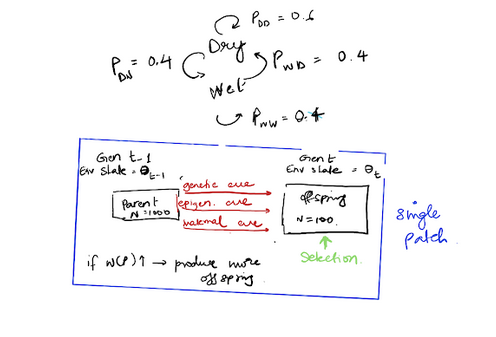

In [2]:

Image("/home/usriniva/Pictures/Screenshots/draft1_model.png")  # can be .png, .jpeg, etc.


In [3]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])


# Simulate environment over time
n_gen = 2000
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9],  
    [0.2],  
 ])

#baseline maternal effect
population_size= 1000


In [4]:
z_a_t= np.random.uniform(low=-10, high=10, size=population_size) 

y_a_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)



In [5]:
sigma_mut=0.8
sigma_epimut=0.3
sigma_d=0.7
sigma_epsilon= 0.05

##starting values of weights

alpha= np.random.uniform(low=0, high=1, size=population_size) 
beta = np.random.uniform(low=0, high=1, size=population_size) 
gamma = np.random.uniform(low=0, high=1, size=population_size) 
beta= np.random.uniform(low=0, high=1, size=population_size) 

##FOR NOW WE SET MATERNAL WEIGHT AND TRAIT TO 0
#gamma= np.random.uniform(low=0, high=1, size=population_size) 

m0_a = 0.01

In [6]:
mu_g= 1e-06
mu_e= 1e-03


In [7]:
mean_A_over_time = []
mean_B_over_time = []
mean_fitness_over_time = []
phenotype_over_time = []
var_fitness_over_time= []

optimum_A_over_time = []
optimum_B_over_time = []
population_size = 1000

mean_alpha =[]
mean_beta= []
mean_gamma= []
##start at dry
current_state = 0 


results =  pd.DataFrame(columns=['alpha_mean','alpha_var','beta_mean','beta_var','gamma_mean','gamma_var'])


    
for _ in range(n_gen): 
        # Initialize variables for the simulation
        current_state = 0  # start dry
        gen = 0
        keep_going = True
              
        # Choose the current environment
        env_sequence.append(states[current_state])  # Start at "Dry"
        current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
        # Optimum stats
        A0 = Env[current_state]
        optimum_A_over_time.append(A0)
            
        # Sample variances
        epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
        epsilon_t = np.random.normal(0, sigma_epsilon, size=population_size)
        d_t = np.random.normal(0, sigma_d, size=population_size)
            
        # Trait A
        z_a_t_plus_1 = z_a_t + mu_g * epsilon_Z
        y_a_t_plus_1 = y_a_t + mu_e * epsilon_Y
            
        # Maternal effects from -1 generation
        m1_a = (A0 - (z_a_t + y_a_t))
        mt_a = (m0_a + m1_a + epsilon_t)
            
        # Full phenotype
        P_a = alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mt_a + d_t
            
                        
        mean_A_over_time.append(P_a.mean())
            
        P_com = z_dist(P_a, Env[current_state])
        #print(P_com)
        fitness = w(P_com)
        relative_fitness = fitness / P_com.mean()
        phenotype_over_time.append(P_com.mean())
            
        # Save results
        new_row = pd.DataFrame({'alpha_mean': [alpha.mean()],
                                'alpha_var': [alpha.var()],
                                'beta_mean': [beta.mean()],
                                'beta_var': [beta.var()],
                                'gamma_mean': [gamma.mean()],
                                'gamma_var': [gamma.var()]})
        
        results = pd.concat([results, new_row], ignore_index=True)
            
        # Create a dataframe of individual data
        df = pd.DataFrame({'A_g': z_a_t_plus_1,
                                'A_e': y_a_t_plus_1,
                                'alpha': alpha,
                                'beta': beta,
                                'gamma': gamma,
                                'Mat_a': mt_a,
                                'Phenotype': P_com,
                                'fitness': fitness,
                                'relative_fitness': relative_fitness})
            
        mean_fitness_over_time.append(df['fitness'].mean())
        var_fitness_over_time.append(df['fitness'].var())
            
        # Resample for next generation
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        z_a_t = sampled_df['A_g'].values
        y_a_t = sampled_df['A_e'].values 
        alpha = sampled_df['alpha'].values
        beta = sampled_df['beta'].values
        gamma = sampled_df['gamma'].values
       # print('alpha',alpha)



    

/tmp/ipykernel_13692/2918318757.py:69: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [43]:
results

,alpha_mean,alpha_var,beta_mean,beta_var,gamma_mean,gamma_var
0,0.494439,0.084870,0.475308,0.081601,0.486508,8.048086e-02
1,0.490393,0.077371,0.462403,0.085687,0.473749,6.515898e-02
2,0.497659,0.075929,0.463737,0.082149,0.485647,6.587079e-02
3,0.503535,0.073861,0.469969,0.085542,0.514610,6.332575e-02
4,0.498870,0.070901,0.469246,0.085400,0.496554,6.190501e-02
...,...,...,...,...,...,...
1995,0.686215,0.023057,0.545873,0.001268,0.896656,7.893245e-07
1996,0.687219,0.023198,0.545638,0.001276,0.896650,7.941531e-07
1997,0.688894,0.023429,0.545245,0.001288,0.896640,8.020472e-07
1998,0.687219,0.023198,0.545638,0.001276,0.896650,7.941531e-07


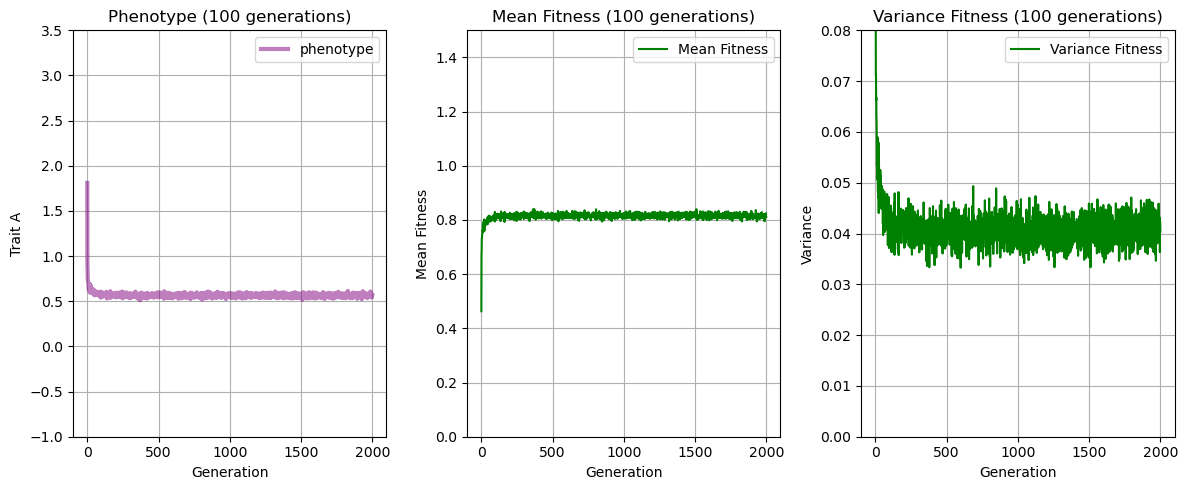

In [44]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 3, 1)
#plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(phenotype_over_time, label='phenotype', color='purple',linewidth=3, alpha=0.5)
plt.title('Phenotype (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 3.5)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 3, 2)
plt.plot(mean_fitness_over_time, label='Mean Fitness', color='green')
plt.title('Mean Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.ylim(0, 1.5)
plt.grid(True)
plt.legend()

# Variance Fitness
plt.subplot(1, 3, 3)
plt.plot(var_fitness_over_time, label='Variance Fitness', color='green')
plt.title('Variance Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
plt.ylim(0, 0.08)
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()

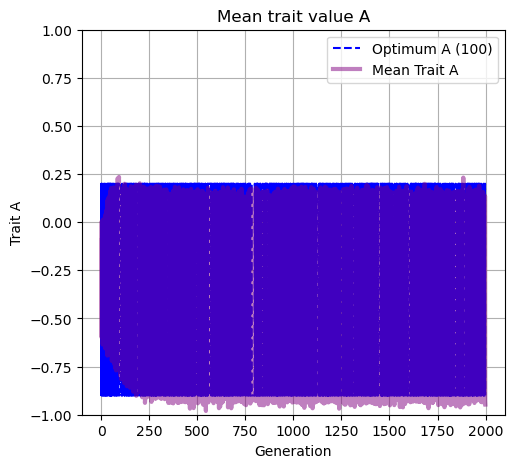

In [8]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 2, 1)
plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(mean_A_over_time, label='Mean Trait A', color='purple',linewidth=3, alpha=0.5)
plt.title('Mean trait value A')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.grid(True)
plt.ylim(-1, 1)
plt.legend()


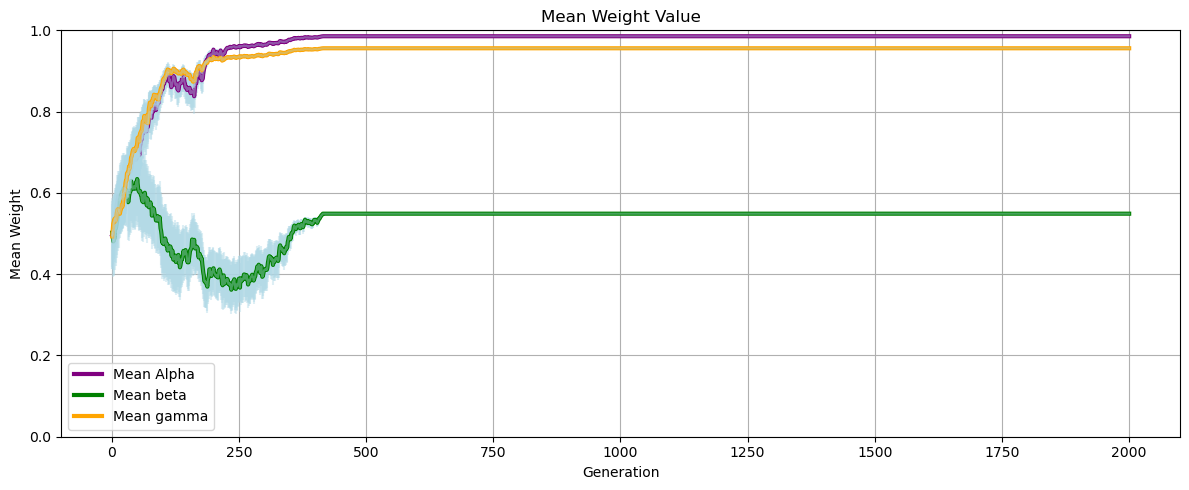

In [9]:
plt.figure(figsize=(12, 5))

generations = np.linspace(1,n_gen, n_gen)
# Mean Trait A comparison

y=results['alpha_mean']
error=results['alpha_var']


plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(generations,y, label='Mean Alpha', color='purple',linewidth=3)


y=results['beta_mean']
error=results['beta_var']

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(generations,y, label='Mean beta', color='green',linewidth=3)


y=results['gamma_mean']
error=results['gamma_var']
plt.errorbar(generations, y, yerr=(error, error), alpha=0.4, color = 'lightblue')
plt.plot(generations,y, label='Mean gamma', color='orange',linewidth=3)



plt.title('Mean Weight Value')
plt.xlabel('Generation')
plt.ylabel('Mean Weight')
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### In two dimentions

In [10]:

def z_combined(z1,z2, env_opt):
    x0,y0 = env_opt
    return ((np.sqrt((x0 - z1)**2 + (y0 - z2)**2)))


def w(z_combined):
    return (np.exp(-z_combined**2 /(2))) 

In [11]:
# Simulation parameters
generations = 3000

# Define environment optima (only 1D now)
Env = np.array([
    [0.9, -0.3],  # From Dry
    [0.2, 0.5],  # From Normal
 ])


In [12]:

# Define states
states = ["Dry", "Wet"]
n_states = len(states)

s = 0.1#stickyness param 

prob_stay= 0.6 * s

# Transition probability matrix
P = np.array([
    [prob_stay, (1-prob_stay)],  # From Dry, [[probability of staying in dry], probability of transitioning to wet]]
    [(1-prob_stay), prob_stay]   # From Wet  [[probability of switching to dry], probability of staying in Wet]]
])

P

array([[0.06, 0.94],
       [0.94, 0.06]])

In [13]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)

# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 2000
env_sequence = []
current_state = 0 

Env = np.array([
    [-0.9, -0.3],  
    [0.2, 0.5],  
 ])

#baseline maternal effect

m0_a, m0_b = [0.01, 0.02]
sigma_epsilon= 0.9
epsilon_t = np.random.normal(0, sigma_epsilon)


m_1a = 0
m_1b = 0

In [14]:
z_a_t= np.random.uniform(low=-10, high=10, size=population_size) 
z_b_t= np.random.uniform(low=-1, high=1, size=population_size)
y_a_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)
y_b_t = np.random.uniform(low=-0.5, high=0.5, size=population_size)


In [15]:
sigma_mut=0.8
sigma_epimut=0.3
sigma_d=0.7
sigma_epsilon= 0.05

##starting values of weights

alpha= np.random.uniform(low=0, high=1, size=population_size) 
beta = np.random.uniform(low=0, high=1, size=population_size) 
gamma = np.random.uniform(low=0, high=1, size=population_size) 
beta= np.random.uniform(low=0, high=1, size=population_size) 

##FOR NOW WE SET MATERNAL WEIGHT AND TRAIT TO 0
#gamma= np.random.uniform(low=0, high=1, size=population_size) 

m0_a = 0.01

In [16]:
mean_A_over_time = []
mean_B_over_time = []
mean_fitness_over_time = []
phenotype_over_time = []
var_fitness_over_time= []

optimum_A_over_time = []
optimum_B_over_time = []
population_size = 1000

mean_alpha =[]
mean_beta= []
mean_gamma= []
var_alpha= []
var_beta= []
var_gamma= []
##start at dry
current_state = 0 


for t in range(1, n_gen+1):
        env_sequence.append(states[current_state])  # Start at "Dry"
        current_state = np.random.choice([0,1], p=Transition_probs[current_state])

        #optima stats
        A0, B0 = Env[current_state]
        optimum_A_over_time.append(A0)
        optimum_B_over_time.append(B0)
        
       ## sample variances
        epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
        epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
        epsilon_t = np.random.normal(0, sigma_epsilon, size=population_size)
        d_t = np.random.normal(0, sigma_d, size=population_size)

        ##trait A
    
        z_a_t_plus_1 = z_a_t + epsilon_Z
        y_a_t_plus_1 = y_a_t + epsilon_Z

        z_b_t_plus_1 = z_b_t + epsilon_Z
        y_b_t_plus_1 = y_b_t + epsilon_Y


        ## maternal effects from -1 generation
        m1_a = (A0-(z_a_t + y_a_t))
        m1_b = (B0-(z_b_t + y_b_t))
        
        mt_a= (m0_a + m1_a + epsilon_t)
        mt_b= (m0_b + m1_b + epsilon_t) 

        
        P_a = alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mt_a + d_t
        P_b = alpha * z_b_t_plus_1 + beta * y_b_t_plus_1 + gamma * mt_b + d_t

        mean_alpha.append(alpha.mean())
        var_alpha.append(alpha.var())
        mean_beta.append(beta.mean())
        var_beta.append(beta.var())
        mean_gamma.append(gamma.mean())
        var_gamma.append(gamma.var())
    
        mean_A_over_time.append(P_a.mean())
        mean_B_over_time.append(P_b.mean())

    
        P_com= z_combined(P_a,P_b,Env[current_state])
    
        
        fitness = w(P_com)
        relative_fitness = fitness/ P_com.mean()
    
        phenotype_over_time.append(P_com.mean())

        df = pd.DataFrame({
        'A_g': z_a_t_plus_1,
        'A_e': y_a_t_plus_1,
        'B_g': z_b_t_plus_1,
        'B_e': y_b_t_plus_1,
        'alpha': alpha,
        'beta': beta,
        'gamma': gamma,
        'Mat_a': mt_a,
        'Mat_b': mt_b,
        'Phenotype': P_com,
        'fitness': fitness,
        'relative_fitness': relative_fitness
            })
    
        mean_fitness_over_time.append(df['fitness'].mean())
        
        var_fitness_over_time.append(df['fitness'].var())
    
        sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
        
        z_a_t=sampled_df['A_g'].values
        y_a_t=sampled_df['A_e'].values
        z_b_t=sampled_df['B_g'].values
        y_b_t=sampled_df['B_e'].values 
        alpha = sampled_df['alpha'].values
        beta = sampled_df['beta'].values
        gamma = sampled_df['gamma'].values

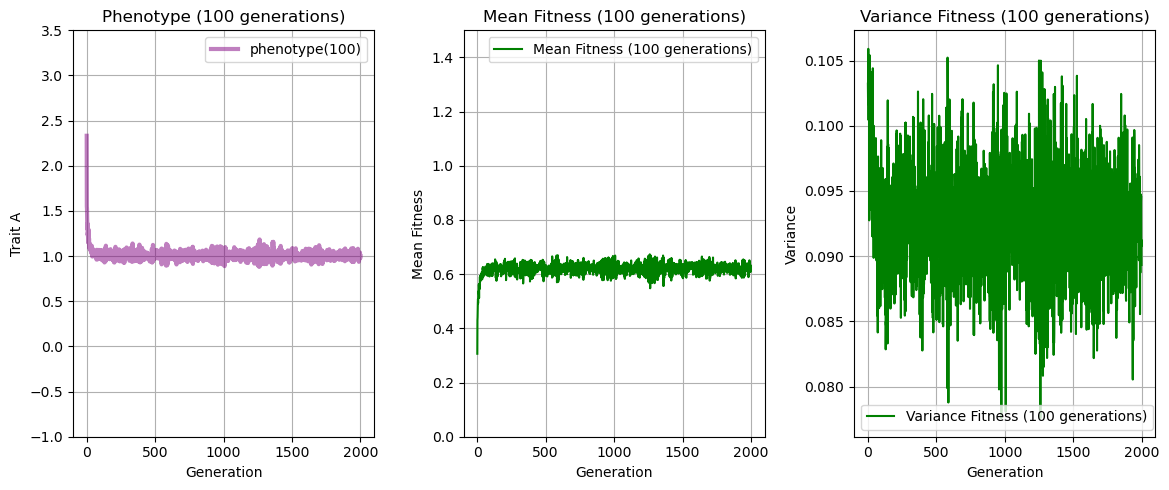

In [17]:

plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 3, 1)
#plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(phenotype_over_time, label='phenotype(100)', color='purple',linewidth=3, alpha=0.5)
plt.title('Phenotype (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 3.5)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 3, 2)
plt.plot(mean_fitness_over_time, label='Mean Fitness (100 generations)', color='green')
plt.title('Mean Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Mean Fitness')
plt.ylim(0, 1.5)
plt.grid(True)
plt.legend()

# Variance Fitness
plt.subplot(1, 3, 3)
plt.plot(var_fitness_over_time, label='Variance Fitness (100 generations)', color='green')
plt.title('Variance Fitness (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Variance')
#plt.ylim(0, 0.08)
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()
        

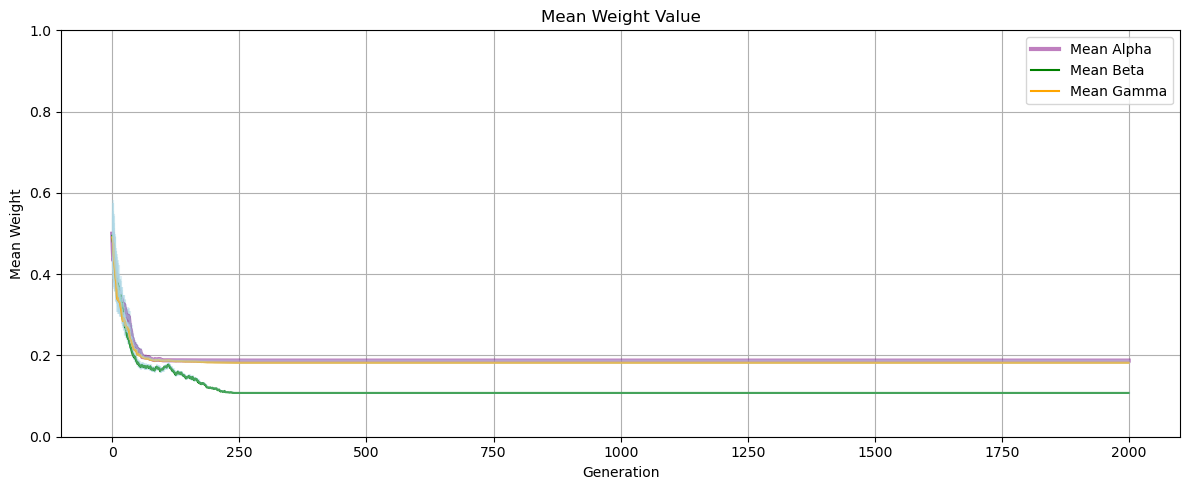

In [18]:
plt.figure(figsize=(12, 5))
generations = np.linspace(1,n_gen, n_gen)

# Mean Trait A comparison
y=mean_alpha
error=var_alpha

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(mean_alpha, label='Mean Alpha', color='purple',linewidth=3, alpha=0.5)

y=mean_beta
error=var_beta

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(mean_beta, label='Mean Beta', color='green')


y=mean_gamma
error=var_gamma

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(mean_gamma, label='Mean Gamma', color='orange')

plt.title('Mean Weight Value')
plt.xlabel('Generation')
plt.ylabel('Mean Weight')
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

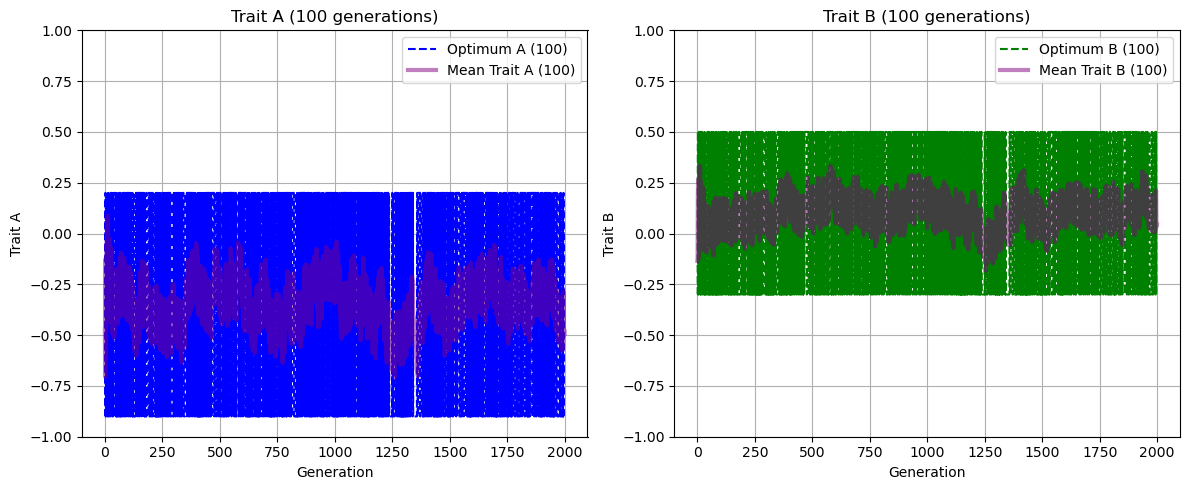

In [19]:
plt.figure(figsize=(12, 5))

# Mean Trait A comparison
plt.subplot(1, 2, 1)
plt.plot(optimum_A_over_time, label='Optimum A (100)', linestyle='--', color='blue')
plt.plot(mean_A_over_time, label='Mean Trait A (100)', color='purple',linewidth=3, alpha=0.5)
plt.title('Trait A (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait A')
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# Mean Trait B comparison
plt.subplot(1, 2, 2)
plt.plot(optimum_B_over_time, label='Optimum B (100)', linestyle='--', color='green')
plt.plot(mean_B_over_time, label='Mean Trait B (100)', color='purple',linewidth=3, alpha =0.5)
plt.title('Trait B (100 generations)')
plt.xlabel('Generation')
plt.ylabel('Trait B')
plt.grid(True)
plt.ylim(-1, 1)
plt.legend()

plt.tight_layout()
plt.show()

### More dimentions

#### 10 dimentions

In [24]:

#fitness
def w(z_combined):
    return (np.exp(-z_combined**2 /(2))) 

#combined phenotype
def z_dist(z, env_opt):
    if np.size(z, axis=1) != np.size(env_opt,axis=1):
        raise Exception("Sorry, enviromental optima are different from number of dimentions")
    return np.sqrt(np.sum((env_opt - z)**2, axis =1)) #elemnt wise env-z; squared then summed then root
    

In [61]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)
n_dim= 10


# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 2000
env_sequence = []
current_state = 0 

Env = np.array([
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
 ])

#baseline maternal effect

m0 = np.random.uniform(low=0, high=1, size=n_dim)


#starting maternal effect
m_1 = np.zeros(n_dim)

#population size
population_size= 1000

In [62]:
z_a_t= np.random.uniform(low=-10, high=10, size=(population_size, n_dim)) 

y_a_t = np.random.uniform(low=-0.5, high=0.5, size=(population_size, n_dim))



In [64]:

##define all sigmas
sigma_mut=0.8
sigma_epimut=0.3
sigma_d=0.7
sigma_epsilon= 0.05

##starting values of weights

# Generate raw random values
raw = np.random.uniform(low=0, high=1, size=(population_size, 3))

# Normalize so that the sum across each row is 1
normalized = raw / raw.sum(axis=1, keepdims=True)

#np.allclose(normalized.sum(axis=1), 1.0)


In [65]:
# Split into alpha, beta, gamma
alpha = normalized[:, 0].reshape(-1, 1)
beta = normalized[:, 1].reshape(-1, 1)
gamma = normalized[:, 2].reshape(-1, 1)


In [66]:

#baseline maternal effect
m0_a = 0.01

## mutation rate

mu_g= 1e-06
mu_e= 1e-03


In [67]:
epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)

In [68]:
mean_A_over_time = []
mean_B_over_time = []
mean_fitness_over_time = []
phenotype_over_time = []
var_fitness_over_time= []

optimum_A_over_time = []
optimum_B_over_time = []
population_size = 1000

mean_alpha =[]
mean_beta= []
mean_gamma= []
##start at dry
current_state = 0 


results =  pd.DataFrame(columns=['alpha_mean','alpha_var','beta_mean','beta_var','gamma_mean','gamma_var'])


for _ in range(n_gen): 
    # Initialize variables for the simulation
    current_state = 0  # start dry
    gen = 0
    keep_going = True
          
    # Choose the current environment
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
    # Optimum stats
    A0 = np.array(Env[current_state].reshape(1, -1))
    optimum_A_over_time.append(A0)
        
    # Sample variances
    epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
    epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
    epsilon_t = np.random.normal(0, sigma_epsilon, size=population_size)
    d_t = np.random.normal(0, sigma_d, size=population_size)
        
    # Trait A
    z_a_t_plus_1 = z_a_t + (mu_g * epsilon_Z).reshape(-1, 1)
    y_a_t_plus_1 = y_a_t + (mu_e * epsilon_Y).reshape(-1, 1)
        
    # Maternal effects from -1 generation
    m1_a = A0 - (z_a_t + y_a_t)
    mt_a = (m0_a + m1_a + epsilon_t.reshape(-1, 1))
        
    # Full phenotype
    P_a = alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mt_a + d_t.reshape(-1, 1)
        
    mean_A_over_time.append(P_a.mean())
        
    P_com = z_dist(P_a, A0)
    fitness = w(P_com)
    relative_fitness = fitness / P_com.mean()
    phenotype_over_time.append(P_com.mean())
        
    # Save results
    new_row = pd.DataFrame({'alpha_mean': [alpha.mean()],
                            'alpha_stdev': [alpha.std()],
                            'beta_mean': [beta.mean()],
                            'beta_stdev': [beta.std()],
                            'gamma_mean': [gamma.mean()],
                            'gamma_stdev': [gamma.std()]})
    
    results = pd.concat([results, new_row], ignore_index=True)
    
    array= [z_a_t_plus_1, y_a_t_plus_1, alpha, beta, gamma, mt_a, P_com, fitness, relative_fitness]
    
    # Convert each array to a list of rows (each row is a [10]-element list)
    arrays_as_lists = [arr.tolist() for arr in array]
    
    # Transpose the list so that for each row index, we collect one [10] list from each array
    # This gives us 1000 rows, where each element is one [10]-element list
    zipped_rows = list(map(list, zip(*arrays_as_lists)))  # from https://stackoverflow.com/questions/6473679/transpose-list-of-lists
       
    df= pd.DataFrame(zipped_rows, columns=['A_g',
                                          'A_e',
                                          'alpha',
                                          'beta',
                                          'gamma',
                                          'Mat_a',
                                          'Phenotype',
                                          'fitness',
                                          'relative_fitness'])
    
   # print(df)
    mean_fitness_over_time.append(df['fitness'].mean())
    #var_fitness_over_time.append(df['fitness'].var())
    #relative_fitness = df['relative_fitness'].astype(float)  
    
    # Resample for next generation
    sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
    z_a_t =  np.vstack(sampled_df['A_g'].values)
    y_a_t =  np.vstack(sampled_df['A_e'].values) 
    alpha =  np.vstack(sampled_df['alpha'].values)
    beta =  np.vstack(sampled_df['beta'].values)
    gamma =  np.vstack(sampled_df['gamma'].values)
    # print('alpha',alpha)


    

/tmp/ipykernel_13692/4060719933.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [49]:
results['alpha_mean'] + results['beta_mean'] +  results['gamma_mean']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1995    1.0
1996    1.0
1997    1.0
1998    1.0
1999    1.0
Length: 2000, dtype: float64

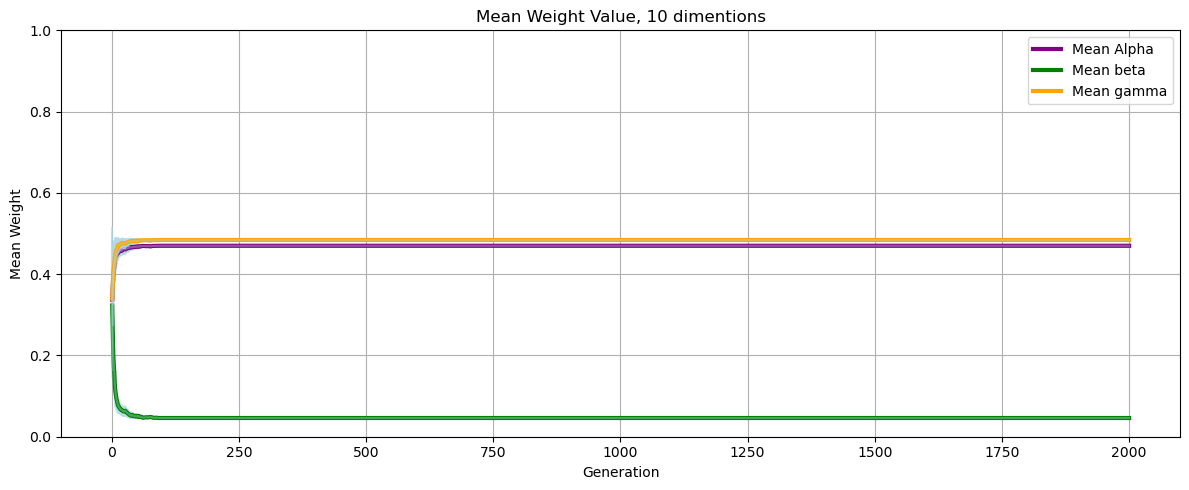

In [69]:
plt.figure(figsize=(12, 5))

generations = np.linspace(1,n_gen, n_gen)
# Mean Trait A comparison

y=results['alpha_mean']
error=results['alpha_stdev']


plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(generations,y, label='Mean Alpha', color='purple',linewidth=3)


y=results['beta_mean']
error=results['alpha_stdev']

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lightblue')
plt.plot(generations,y, label='Mean beta', color='green',linewidth=3)


y=results['gamma_mean']
error=results['alpha_stdev']
plt.errorbar(generations, y, yerr=(error, error), alpha=0.4, color = 'lightblue')
plt.plot(generations,y, label='Mean gamma', color='orange',linewidth=3)



plt.title('Mean Weight Value, 10 dimentions')
plt.xlabel('Generation')
plt.ylabel('Mean Weight')
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 100 dimentions

In [54]:
# Define states
states = ["Dry", "Wet"]
n_states = len(states)
n_dim= 100


# Transition probability matrix
Transition_probs = np.array([
    [0.6, 0.4],  # From Dry
    [0.4, 0.6]   # From Wet
])
# Simulate environment over time
n_gen = 2000
env_sequence = []
current_state = 0 

Env = np.array([
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
    np.random.uniform(low=-1, high=1, size=n_dim) ,  
 ])

#baseline maternal effect

m0 = np.random.uniform(low=0, high=1, size=n_dim)


#starting maternal effect
m_1 = np.zeros(n_dim)

#population size
population_size= 1000

In [55]:
z_a_t= np.random.uniform(low=-10, high=10, size=(population_size, n_dim)) 

y_a_t = np.random.uniform(low=-0.5, high=0.5, size=(population_size, n_dim))


##define all sigmas
sigma_mut=0.8
sigma_epimut=0.3
sigma_d=0.7
sigma_epsilon= 0.05

##starting values of weights

# Generate raw random values
raw = np.random.uniform(low=0, high=1, size=(population_size, 3))

# Normalize so that the sum across each row is 1
normalized = raw / raw.sum(axis=1, keepdims=True)

#np.allclose(normalized.sum(axis=1), 1.0)

# Split into alpha, beta, gamma
alpha = normalized[:, 0].reshape(-1, 1)
beta = normalized[:, 1].reshape(-1, 1)
gamma = normalized[:, 2].reshape(-1, 1)

In [57]:
#baseline maternal effect
m0_a = 0.01

## mutation rate

mu_g= 1e-06
mu_e= 1e-03


In [58]:
epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)

In [59]:
mean_A_over_time = []
mean_B_over_time = []
mean_fitness_over_time = []
phenotype_over_time = []
var_fitness_over_time= []

optimum_A_over_time = []
optimum_B_over_time = []
population_size = 1000

mean_alpha =[]
mean_beta= []
mean_gamma= []
##start at dry
current_state = 0 


results =  pd.DataFrame(columns=['alpha_mean','alpha_var','beta_mean','beta_var','gamma_mean','gamma_var'])


for _ in range(n_gen): 
    # Initialize variables for the simulation
    current_state = 0  # start dry
    gen = 0
    keep_going = True
          
    # Choose the current environment
    env_sequence.append(states[current_state])  # Start at "Dry"
    current_state = np.random.choice([0, 1], p=Transition_probs[current_state])
    # Optimum stats
    A0 = np.array(Env[current_state].reshape(1, -1))
    optimum_A_over_time.append(A0)
        
    # Sample variances
    epsilon_Z = np.random.normal(0, sigma_mut, size=population_size)
    epsilon_Y = np.random.normal(0, sigma_epimut, size=population_size)
    epsilon_t = np.random.normal(0, sigma_epsilon, size=population_size)
    d_t = np.random.normal(0, sigma_d, size=population_size)
        
    # Trait A
    z_a_t_plus_1 = z_a_t + (mu_g * epsilon_Z).reshape(-1, 1)
    y_a_t_plus_1 = y_a_t + (mu_e * epsilon_Y).reshape(-1, 1)
        
    # Maternal effects from -1 generation
    m1_a = A0 - (z_a_t + y_a_t)
    mt_a = (m0_a + m1_a + epsilon_t.reshape(-1, 1))
        
    # Full phenotype
    P_a = alpha * z_a_t_plus_1 + beta * y_a_t_plus_1 + gamma * mt_a + d_t.reshape(-1, 1)
        
    mean_A_over_time.append(P_a.mean())
        
    P_com = z_dist(P_a, A0)
    fitness = w(P_com)
    relative_fitness = fitness / P_com.mean()
    phenotype_over_time.append(P_com.mean())
        
    # Save results
    new_row = pd.DataFrame({'alpha_mean': [alpha.mean()],
                            'alpha_stdev': [alpha.std()],
                            'beta_mean': [beta.mean()],
                            'beta_stdev': [beta.std()],
                            'gamma_mean': [gamma.mean()],
                            'gamma_stdev': [gamma.std()]})
    
    results = pd.concat([results, new_row], ignore_index=True)
    
    array= [z_a_t_plus_1, y_a_t_plus_1, alpha, beta, gamma, mt_a, P_com, fitness, relative_fitness]
    
    # Convert each array to a list of rows (each row is a [10]-element list)
    arrays_as_lists = [arr.tolist() for arr in array]
    
    # Transpose the list so that for each row index, we collect one [10] list from each array
    # This gives us 1000 rows, where each element is one [10]-element list
    zipped_rows = list(map(list, zip(*arrays_as_lists)))  # from https://stackoverflow.com/questions/6473679/transpose-list-of-lists
       
    df= pd.DataFrame(zipped_rows, columns=['A_g',
                                          'A_e',
                                          'alpha',
                                          'beta',
                                          'gamma',
                                          'Mat_a',
                                          'Phenotype',
                                          'fitness',
                                          'relative_fitness'])
    
   # print(df)
    mean_fitness_over_time.append(df['fitness'].mean())
    #var_fitness_over_time.append(df['fitness'].var())
    #relative_fitness = df['relative_fitness'].astype(float)  
    
    # Resample for next generation
    sampled_df = df.sample(n=population_size, weights=df['relative_fitness'], replace=True)
    z_a_t =  np.vstack(sampled_df['A_g'].values)
    y_a_t =  np.vstack(sampled_df['A_e'].values) 
    alpha =  np.vstack(sampled_df['alpha'].values)
    beta =  np.vstack(sampled_df['beta'].values)
    gamma =  np.vstack(sampled_df['gamma'].values)
    # print('alpha',alpha)



/tmp/ipykernel_13692/937326964.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


In [ ]:
results['alpha_mean'] + results['beta_mean'] +  results['gamma_mean']

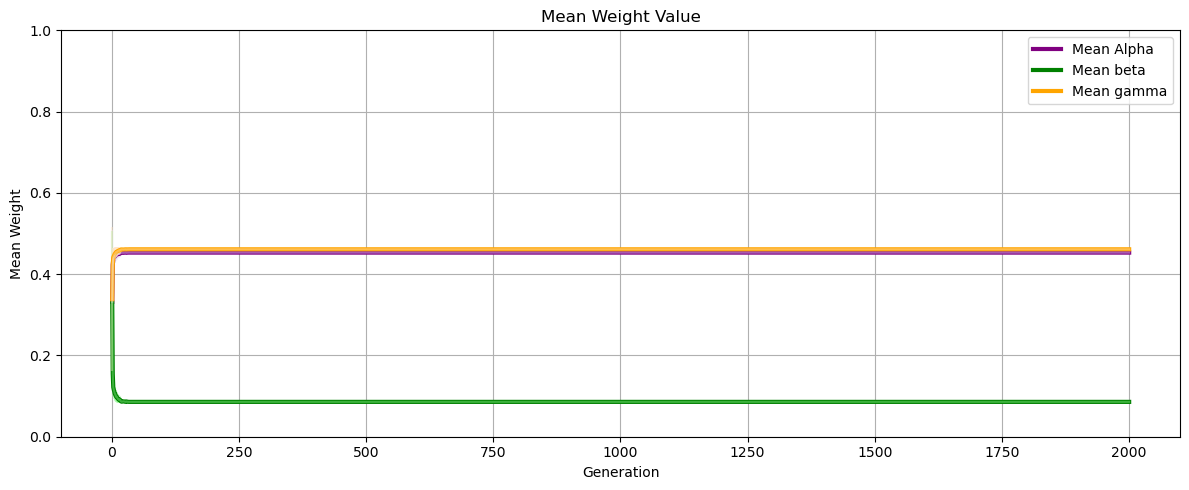

In [60]:
plt.figure(figsize=(12, 5))

generations = np.linspace(1,n_gen, n_gen)
# Mean Trait A comparison

y=results['alpha_mean']
error=results['alpha_stdev']


plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'lavender')
plt.plot(generations,y, label='Mean Alpha', color='purple',linewidth=3)


y=results['beta_mean']
error=results['alpha_stdev']

plt.errorbar(generations, y, yerr=(error, error),alpha=0.4,  color = 'palegreen')
plt.plot(generations,y, label='Mean beta', color='green',linewidth=3)


y=results['gamma_mean']
error=results['alpha_stdev']
plt.errorbar(generations, y, yerr=(error, error), alpha=0.4, color = 'bisque')
plt.plot(generations,y, label='Mean gamma', color='orange',linewidth=3)



plt.title('Mean Weight Value, 100 dimentions')
plt.xlabel('Generation')
plt.ylabel('Mean Weight')
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Two peaks 

$$
f(x) = \exp\left(-\frac{(x - a)^2}{2\sigma^2}\right) + \exp\left(-\frac{(x - b)^2}{2\sigma^2}\right)
$$


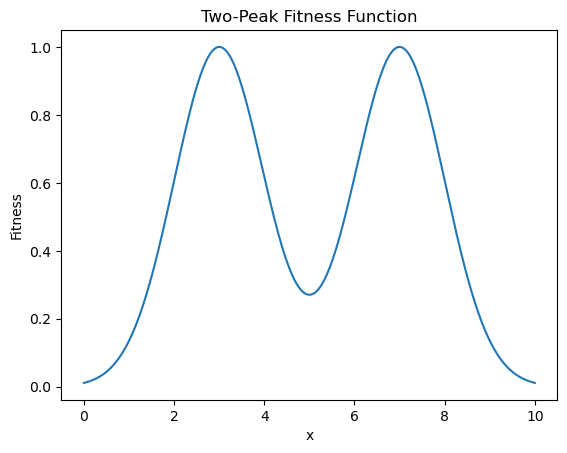

In [35]:

def two_peak_fitness(x, a=7, b=3, sigma=1):
    peak1 = np.exp(-((x - a)**2) / (2 * sigma**2))
    peak2 = np.exp(-((x - b)**2) / (2 * sigma**2))
    return peak1 + peak2

# Example usage
x_values = np.linspace(0, 10, 500)
fitness_values = two_peak_fitness(x_values)

plt.plot(x_values, fitness_values)
plt.title('Two-Peak Fitness Function')
plt.xlabel('x')
plt.ylabel('Fitness')
plt.show()
